# THE H1N1 AND SEASONAL FLU VACCINES PROJECT

As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. Your audience could be someone guiding those public health efforts.
The *CRoss-Industry Standard Process for Data Mining (CRISP-DM)* methodology will be used inthis project

# BUSINESS UNDERSTANDING

Good questions for this stage include:

Who are the stakeholders in this project? Who will be directly affected by the creation of this project?

What business problem(s) will this Data Science project solve for the organization?

What problems are inside the scope of this project?

What problems are outside the scope of this project?

What data sources are available to us?

What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?

Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

## DATA UNDERSTANDING

Consider the following questions when working through this stage:

What data is available to us? Where does it live? Do we have the data, or can we scrape/buy/source the data from somewhere else?

Who controls the data sources, and what steps are needed to get access to the data?

What is our target?

What predictors are available to us?

What data types are the predictors we'll be working with?

What is the distribution of our data?

How many observations does our dataset contain? Do we have a lot of data? Only a little?

Do we have enough data to build a model? Will we need to use resampling methods?

How do we know the data is correct? How is the data collected? Is there a chance the data could be wrong?

## DATA PREPARATION

During this stage, we'll want to handle the following issues:

Detecting and dealing with missing values

Data type conversions (e.g. numeric data mistakenly encoded as strings)

Checking for and removing multicollinearity (correlated predictors)

Normalizing our numeric data

Converting categorical data to numeric format through one-hot encoding

## MODELLING

Consider the following questions during the modeling step:

Is this a classification task? A regression task? Something else?

What models will we try?

How do we deal with overfitting?

Do we need to use regularization or not?

What sort of validation strategy will we be using to check that our model works well on unseen data?

What loss functions will we use?

What threshold of performance do we consider as successful?

## EVALUATION

During this step, we'll evaluate the results of our modeling efforts. Does our model solve the problems that we outlined all the way back during step 1? Why or why not? Often times, evaluating the results of our modeling step will raise new questions, or will cause us to consider changing our approach to the problem. Notice from the CRISP-DM diagram above, that the "Evaluation" step is unique in that it points to both Business Understanding and Deployment. As we mentioned before, Data Science is an iterative process -- that means that given the new information our model has provided, we'll often want to start over with another iteration, armed with our newfound knowledge! Perhaps the results of our model showed us something important that we had originally failed to consider the goal of the project or the scope. Perhaps we learned that the model can't be successful without more data, or different data. Perhaps our evaluation shows us that we should reconsider our approach to cleaning and structuring the data, or how we frame the project as a whole (e.g. realizing we should treat the problem as a classification rather than a regression task). In any of these cases, it is totally encouraged to revisit the earlier steps.

## DEPLOYMENT

During this stage, we'll focus on moving our model into production and automating as much as possible. Everything before this serves as a proof-of-concept or an investigation. If the project has proved successful, then you'll work with stakeholders to determine the best way to implement models and insights. For example, you might set up an automated ETL (Extract-Transform-Load) pipelines of raw data in order to feed into a database and reformat it so that it is ready for modeling. During the deployment step, you'll actively work to determine the best course of action for getting the results of your project into the wild, and you'll often be involved with building everything needed to put the software into production.

*******

*****


Import the necessary libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import r2_score,roc_auc_score,accuracy_score,precision_score,classification_report
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML

import the files

In [10]:
#submission file
sub=pd.read_csv(r'submission_format.csv')

In [96]:
#test
test=pd.read_csv(r'test_set_features.csv')

In [6]:
training_feat=pd.read_csv(r'training_set_features.csv')
training_feat.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [115]:
#training_label
training_label=pd.read_csv(r'training_set_labels.csv')
training_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [117]:
#concatenate training label to training features
label_concat=pd.concat([training_label,training_feat],axis=1)
label_concat

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo
1,1,0,1,1,3.0,2.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,2,1.0,1.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,3,1.0,1.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo
4,4,0,0,4,2.0,1.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0,0,26702,2.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo
26703,26703,0,0,26703,1.0,2.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,0,1,26704,2.0,2.0,0.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,fcxhlnwr,xtkaffoo
26705,26705,0,0,26705,1.0,1.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [118]:
df=pd.DataFrame(label_concat)

In [119]:
#load the columns
df.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine', 'respondent_id',
       'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [120]:
#load the data description
df.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608,13353.000000,1.614521,1.257198,0.048714,0.721122,0.069233,0.824353,...,0.108548,0.475418,3.852810,2.337589,2.352380,4.025536,2.705321,2.095630,0.887558,0.529599
std,7709.791156,0.409052,0.498825,7709.791156,0.912122,0.622186,0.215273,0.448456,0.253854,0.380527,...,0.311077,0.499405,1.000195,1.276825,1.353339,1.077131,1.375216,1.328782,0.749980,0.925264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,0.000000,1.000000,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000
max,26706.000000,1.000000,1.000000,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [121]:
#load the training data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   respondent_id                26707 non-null  int64  
 4   h1n1_concern                 26707 non-null  float64
 5   h1n1_knowledge               26707 non-null  float64
 6   behavioral_antiviral_meds    26707 non-null  float64
 7   behavioral_avoidance         26707 non-null  float64
 8   behavioral_face_mask         26707 non-null  float64
 9   behavioral_wash_hands        26707 non-null  float64
 10  behavioral_large_gatherings  26707 non-null  float64
 11  behavioral_outside_home      26707 non-null  float64
 12  behavioral_touch_face        26707 non-null  float64
 13  doctor_recc_h1n1

In [122]:
#look at the null values
df_null=df.isnull().sum()
df_null

respondent_id                  0
h1n1_vaccine                   0
seasonal_vaccine               0
respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_st

                             respondent_id  h1n1_vaccine  seasonal_vaccine  \
respondent_id                     1.000000     -0.003280         -0.004652   
h1n1_vaccine                     -0.003280      1.000000          0.377143   
seasonal_vaccine                 -0.004652      0.377143          1.000000   
respondent_id                     1.000000     -0.003280         -0.004652   
h1n1_concern                      0.017146      0.121858          0.154098   
h1n1_knowledge                    0.003626      0.117210          0.118687   
behavioral_antiviral_meds        -0.008458      0.040226          0.006013   
behavioral_avoidance              0.011288      0.048654          0.076136   
behavioral_face_mask             -0.006427      0.070019          0.050001   
behavioral_wash_hands             0.010663      0.074964          0.112082   
behavioral_large_gatherings       0.004704      0.017377          0.063918   
behavioral_outside_home           0.009080      0.022046        

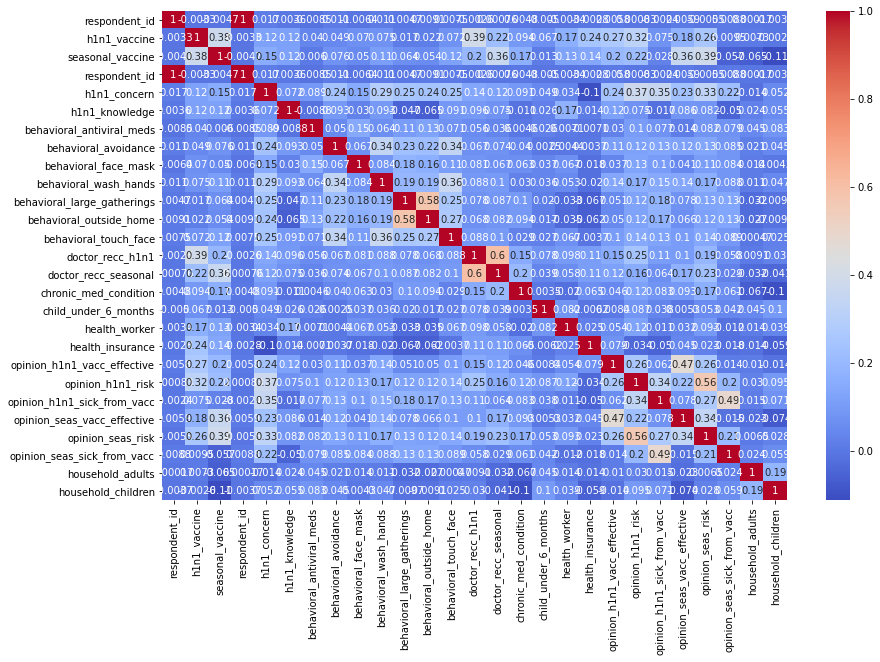

In [123]:
#check for multicollinearity
df_corr=df.corr()
print(df_corr)

plt.figure(figsize=(14,9))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

*********

<span style="color:red;">health_insurance </span>

since the insurance cannot be null values a person either has insurance or not.we will replace null with 0 to indicate no insurance

<span style="color:red;">H1N1 concern</span>

for H1N1 concern if the respondent had knowledge we will fill the null values for concern with 1 if the respondent had no knowledge we will fill the null with 0

<span style="color:red;">behavioral_antiviral_meds</span>

for behavioral_antiviral_meds we will fill the null values with the mode 
for behavioral_avoidance we will replce null based on the h1n1 concern with those that were highly concerned we will assume they avoided gatherings.

<span style="color:red;">behavioral_face_mask</span>

if the responded had knowledge about H1N1 and avoided contanct with others with flu like symptoms then we will fill the null values for face mask with 1 otherwise 0

<span style="color:red;">behavioral_wash_hands</span>

for behavioral_wash_hands if the respondent had knowldege and wore mask is an indication that the respondent took precautionary action of washing hands as well

<span style="color:red;">behavioral_large_gatherings</span>

for behavioral_large_gatherings if the respondent avoided close contanct with people who had flu-like symptoms then probably thier exposure to gatherings was reduced as well

 <span style="color:red;">behavioral_outside_home</span>

for behavioral_outside_home if the respondent avoided contanct withflu like symptoms and exposure to public gathering then the would have prefered to stay at home or reduce contact with people outside their household

<span style="color:red;">behavioral_touch_face</span>

for behavioral_touch_face if the respondent is knowlegdable ,has a face mask and washes hands then the respondent probbly avoided touching their eyes,nose or mouth

<span style="color:red;">doctor_recc_h1n1</span>

for doctor_recc_h1n1 if the respondent is very concerned of H1N1 and is knowledgable and has taken antiviral medication probably the vaccine they took was also recommended by the doctor either at the hospital or through the media

<span style="color:red;">doctor_recc_seasonal</span>

for doctor_recc_seasonal if the respondents H1N1 was reccomended by the doctor then probably the seasonal flu vaccines were recommended by the doctorthrough the same medium

<span style="color:red;">chronic_med_condition</span>

for chronic_med_condition for respondents with null values in chronic condition we will replace with 0 

**NB**
For the rest of the null columns will be replaced with thier mode values





******

In [124]:
#fill the null with zero
#health insurance
df['health_insurance']=df['health_insurance'].fillna(0)

#h1n1_concern
df['h1n1_concern'] = np.where(
    df['h1n1_knowledge'] >= 1,  # Condition
    df['h1n1_concern'].fillna(df['h1n1_knowledge']),  # Value if condition is True
    df['h1n1_concern'].fillna(0))

#h1n1 knowlegde
df['h1n1_knowledge']=np.where( 
    df['behavioral_antiviral_meds']>=1,
    df['h1n1_knowledge'].fillna(1),
    df['h1n1_knowledge'].fillna(0) )

#behavioral_antiviral_meds
mode_behavior=df['behavioral_antiviral_meds'].mode()[0]
df['behavioral_antiviral_meds']=df['behavioral_antiviral_meds'].fillna(mode_behavior)

#behavioral_avoidance
df['behavioral_avoidance']=np.where(df['h1n1_concern']==3,
                                   df['behavioral_avoidance'].fillna(1),
                                    df['behavioral_avoidance'].fillna(0))

#behavioral_face_mask
#if the responded had knowledge about H1N1 and avoided contanct with others with flu like symptoms then we will fill the null values for face mask with 1 otherwise 0
df['behavioral_face_mask']= np.where((df['h1n1_knowledge']>= 1) & (df['behavioral_avoidance']==1),
                                    df['behavioral_face_mask'].fillna(1),
                                    df['behavioral_face_mask'].fillna(0))

#for behavioral_wash_hands if the respondent had knowldege and wore mask is an indication that the respondent took precautionary action of washing hands as well
df['behavioral_wash_hands'] = np.where((df['h1n1_knowledge']>= 1) & (df['behavioral_face_mask']==1),
                                      df['behavioral_wash_hands'].fillna(1),
                                       df['behavioral_wash_hands'].fillna(0) )

# for behavioral_large_gatherings if the respondent avoided close contanct with people who had flu-like symptoms then probably thier exposure to gatherings was reduced as well
df['behavioral_large_gatherings']= np.where(df['behavioral_avoidance']==1,
                                            df['behavioral_large_gatherings'].fillna(1),
                                             df['behavioral_large_gatherings'].fillna(0))

# for behavioral_outside_home if the respondent avoided contanct withflu like symptoms and exposure to public gathering then the would have prefered to stay at home or reduce contact with people outside their household
df['behavioral_outside_home']=np.where( (df['behavioral_avoidance']==1) & (df['behavioral_large_gatherings']==1),
                                      df['behavioral_outside_home'].fillna(1),
                                       df['behavioral_outside_home'].fillna(0))

#for behavioral_touch_face if the respondent is knowlegdable ,has a face mask and washes hands then the respondent probbly avoided touching their eyes,nose or mouth
df['behavioral_touch_face']= np.where((df['h1n1_knowledge']>=1) & (df['behavioral_face_mask']==1) & (df['behavioral_wash_hands']==1),
                                     df['behavioral_touch_face'].fillna(1),
                                      df['behavioral_touch_face'].fillna(0))

#for doctor_recc_h1n1 if the respondent is very concerned of H1N1 and is knowledgable and has taken antiviral medication probably the vaccine they took was also recommended by the doctor either at the hospital or through the media
df['doctor_recc_h1n1']= np.where((df['h1n1_concern']==3) & (df['h1n1_knowledge']==2) & (df['behavioral_antiviral_meds']==1),
                                 df['doctor_recc_h1n1'].fillna(1),
                                 df['doctor_recc_h1n1'].fillna(0)) 

#for doctor_recc_seasonal if the respondents H1N1 was reccomended by the doctor then probably the seasonal flu vaccines were recommended by the doctorthrough the same medium
df['doctor_recc_seasonal']= np.where(df['doctor_recc_h1n1']==1,
                                    df['doctor_recc_seasonal'].fillna(1),
                                      df['doctor_recc_seasonal'].fillna(0)  ) 

#for chronic_med_condition for respondents with null values in chronic condition we will replace with 0 
df['chronic_med_condition']=df['chronic_med_condition'].fillna(0)

df['child_under_6_months'].fillna(df['child_under_6_months'].mode()[0], inplace=True)
df['health_worker'].fillna(df['health_worker'].mode()[0], inplace=True)
df['opinion_h1n1_vacc_effective'].fillna(df['opinion_h1n1_vacc_effective'].mode()[0], inplace=True)
df['opinion_h1n1_risk'].fillna(df['opinion_h1n1_risk'].mode()[0], inplace=True)
df['opinion_seas_vacc_effective'].fillna(df['opinion_seas_vacc_effective'].mode()[0], inplace=True)

df['opinion_h1n1_sick_from_vacc'].fillna(df['opinion_h1n1_sick_from_vacc'].mode()[0], inplace=True)
df['opinion_seas_risk'].fillna(df['opinion_seas_risk'].mode()[0], inplace=True)
df['opinion_seas_sick_from_vacc'].fillna(df['opinion_seas_sick_from_vacc'].mode()[0], inplace=True)
df['age_group'].fillna(df['age_group'].mode()[0], inplace=True)
df['race'].fillna(df['race'].mode()[0], inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['income_poverty'].fillna(df['income_poverty'].mode()[0], inplace=True)
df['marital_status'].fillna(df['marital_status'].mode()[0], inplace=True)
df['rent_or_own'].fillna(df['rent_or_own'].mode()[0], inplace=True)
df['employment_status'].fillna(df['employment_status'].mode()[0], inplace=True)
df['hhs_geo_region'].fillna(df['hhs_geo_region'].mode()[0], inplace=True)
df['census_msa'].fillna(df['census_msa'].mode()[0], inplace=True)
df['household_adults'].fillna(df['household_adults'].mode()[0], inplace=True)
df['household_children'].fillna(df['household_children'].mode()[0], inplace=True)
df['employment_industry'].fillna(df['employment_industry'].mode()[0], inplace=True)
df['employment_occupation'].fillna(df['employment_occupation'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)







c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [125]:
#seperate numerical from categorical columns
numericals=df.select_dtypes(include=['Float64','int64'])
categoricals=df.select_dtypes(include=['object'])

numerical_columns = numericals.columns.tolist()
categorical_columns = categoricals.columns.tolist()

print("num_col:",numerical_columns)
print("cat_col:",categorical_columns)

num_col: ['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine', 'respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']
cat_col: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']


In [126]:
df

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo
1,1,0,1,1,3.0,2.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,2,1.0,1.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,3,1.0,1.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo
4,4,0,0,4,2.0,1.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0,0,26702,2.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo
26703,26703,0,0,26703,1.0,2.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,0,1,26704,2.0,2.0,0.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,fcxhlnwr,xtkaffoo
26705,26705,0,0,26705,1.0,1.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [127]:
#hot encode the categorical data
encoder=OneHotEncoder(drop='first',sparse_output=False)
data_cat= categoricals.copy()
encoder.fit(data_cat)
encoded_data=encoder.transform(data_cat)
#create a new dataframe
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(data_cat.columns))
encoded_df

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26704,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
#append the encoded data to numerical to make one dataframe
new_training_feat=pd.concat([numericals,encoded_df],axis=1)
new_training_feat

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,1,1,3.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,0,0,2,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,0,1,3,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0,0,4,2.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0,0,26702,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26703,26703,0,0,26703,1.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26704,26704,0,1,26704,2.0,2.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26705,26705,0,0,26705,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
new_training=new_training_feat.drop(new_training_feat.columns[0],axis=1)
new_training

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26703,0,0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26704,0,1,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26705,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


modelling